In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 15})
Size = (16,9)

In [2]:
CasesArgy = pd.read_csv('COVID - Argentina - Total.csv')
Fechas = CasesArgy['Fecha']
CasosNuevos = []
AltasNuevas = []
MuertesNuevas = []
TestNuevos = []
TestNegativosNuevos = []
CasosNuevos.append(CasesArgy['Casos'][0])
AltasNuevas.append(CasesArgy['Altas'][0])
MuertesNuevas.append(CasesArgy['Muertes'][0])
TestNuevos.append(CasesArgy['Test Totales'][0])
TestNegativosNuevos.append(CasesArgy['Test Negativos'][0])
for i in range(CasesArgy.shape[0]-1):
    CasosNuevos.append(CasesArgy['Casos'][i+1]-CasesArgy['Casos'][i])
    AltasNuevas.append(CasesArgy['Altas'][i+1]-CasesArgy['Altas'][i])
    MuertesNuevas.append(CasesArgy['Muertes'][i+1]-CasesArgy['Muertes'][i])
    TestNuevos.append(CasesArgy['Test Totales'][i+1]-CasesArgy['Test Totales'][i])
    TestNegativosNuevos.append(CasesArgy['Test Negativos'][i+1]-CasesArgy['Test Negativos'][i])
CasesArgy['Casos Nuevos'] = CasosNuevos
CasesArgy['Altas Nuevas'] = AltasNuevas
CasesArgy['Muertes Nuevas'] = MuertesNuevas
CasesArgy['Test Nuevos'] = TestNuevos
CasesArgy['Test Negativos Nuevos'] = TestNegativosNuevos
info = '\n (Información actualizada al '+ Fechas[len(Fechas)-1]+')'

In [3]:
def rellenaNan(vector,largo):
    nanSpaces = largo-len(vector)
    aux = np.zeros(nanSpaces)
    aux = aux*np.nan
    aux = list(aux)
    aux.extend(vector)
    return aux

def SA(data,days,largo):
    average = []
    for i in range(len(data)-days):
            j = i + days
            average.append(np.mean((data[j-days:j])))
    average = rellenaNan(average,largo)
    return average  

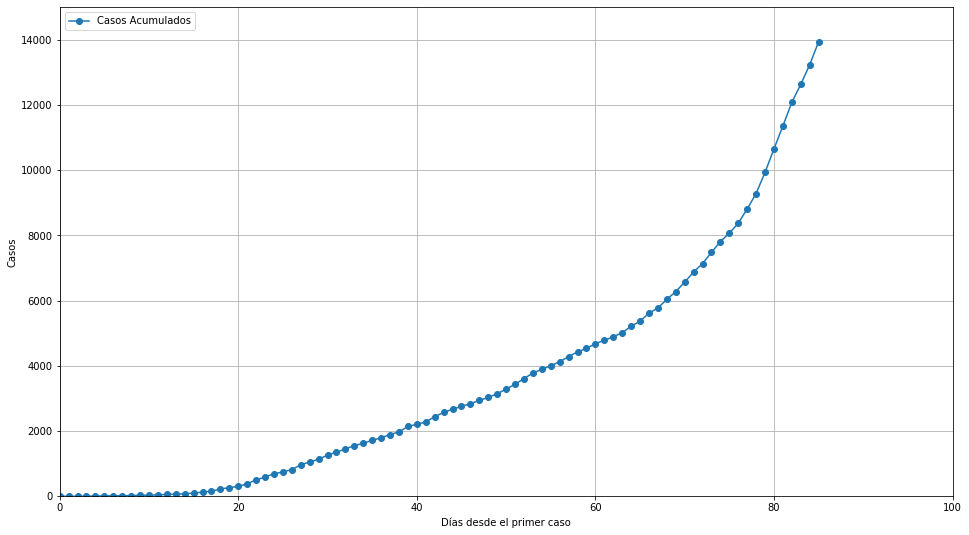

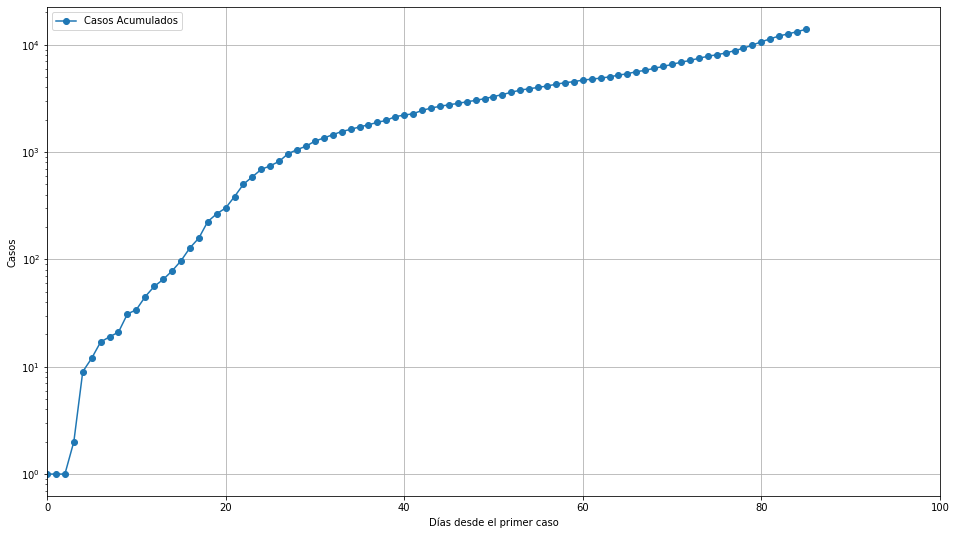

In [4]:
maxDias = 100
xArgy = np.arange(maxDias+1)

#Lineal
plt.figure(6,figsize=Size)
plt.plot(CasesArgy['Casos'],'-o',label='Casos Acumulados')
#---------------------------
plt.xlim([0,maxDias])
plt.ylim([0,15000])
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.grid()
plt.legend(loc='upper left')
plt.show()

plt.figure(6,figsize=Size)
plt.plot(CasesArgy['Casos'],'-o',label='Casos Acumulados')
plt.xlim([0,maxDias])
#plt.ylim([0,1000])
plt.yscale('log')
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.grid()
plt.legend(loc='upper left')
plt.show()


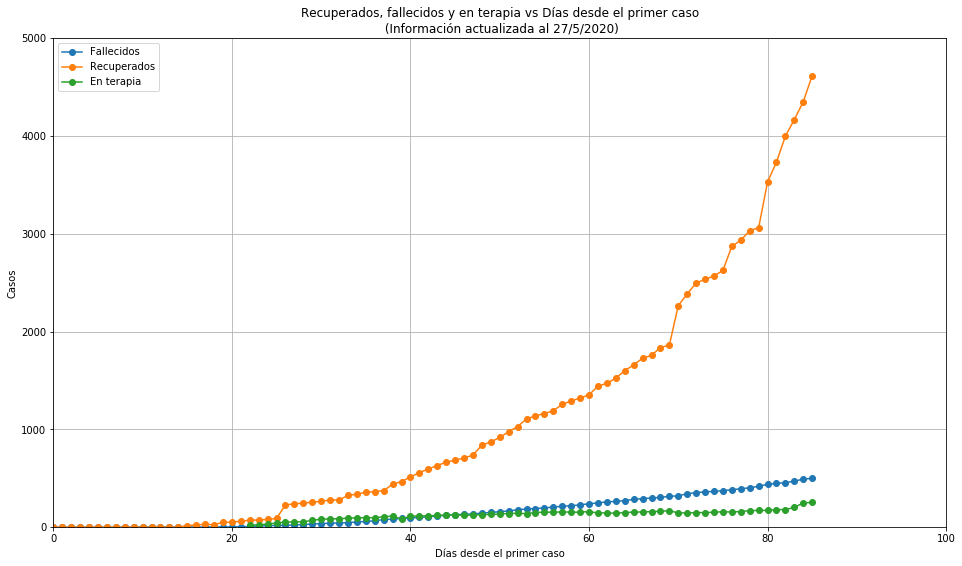

In [5]:
plt.figure(figsize=Size)
plt.title('Recuperados, fallecidos y en terapia vs Días desde el primer caso'+info)
plt.plot(CasesArgy['Muertes'],'-o',label='Fallecidos')
plt.plot(CasesArgy['Altas'],'-o',label='Recuperados')
plt.plot(CasesArgy['Terapia'],'-o',label='En terapia')
plt.xlim([0,maxDias])
plt.ylim([0,5000])
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.grid()
plt.legend(loc='upper left')
plt.savefig(fname='GraficoArg1',quality=100,transparent=False,pad_inches=0)
plt.show()


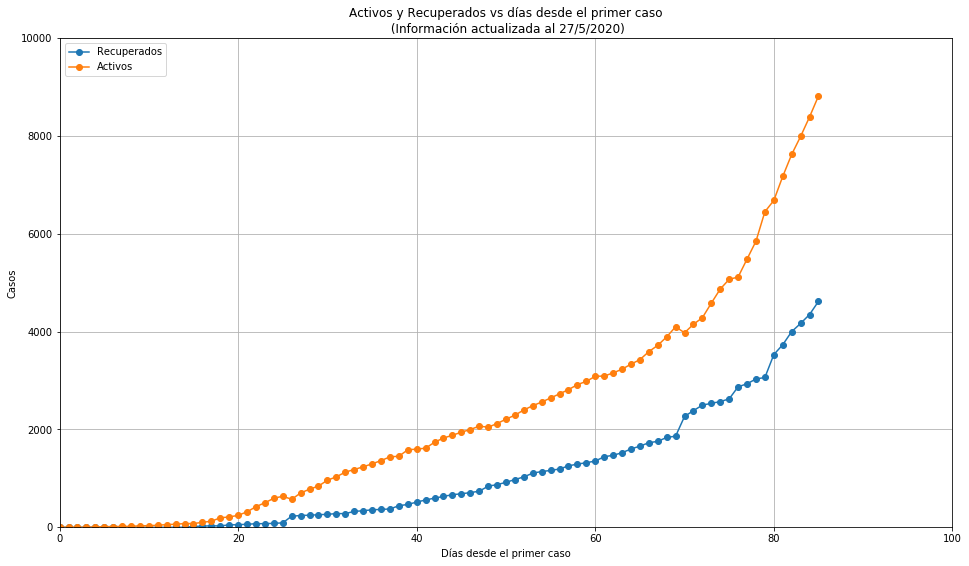

In [6]:
plt.figure(7,figsize=Size)
plt.title('Activos y Recuperados vs días desde el primer caso'+info)
plt.plot(CasesArgy['Altas'],'-o',label='Recuperados')
plt.plot(CasesArgy['Casos']-CasesArgy['Altas']-CasesArgy['Muertes'],'-o',label='Activos')
plt.xlim([0,maxDias])
plt.ylim([0,10000])
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.grid()
plt.legend(loc='upper left')
plt.savefig(fname='GraficoArg2',quality=100,transparent=False,pad_inches=0)
plt.show()

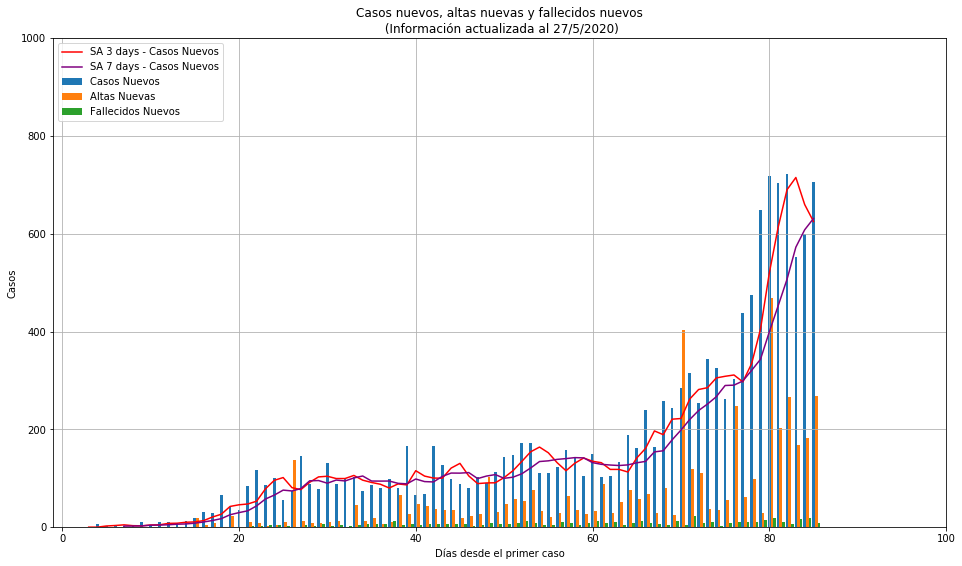

In [7]:
plt.figure(7,figsize=Size)
plt.title('Casos nuevos, altas nuevas y fallecidos nuevos'+info)
x = np.arange(len(CasesArgy['Casos Nuevos'].values))
plt.bar(x + 0.00, CasesArgy['Casos Nuevos'].values, width = 0.30,label='Casos Nuevos')
plt.bar(x + 0.30, CasesArgy['Altas Nuevas'].values, width = 0.30,label='Altas Nuevas')
plt.bar(x + 0.60, CasesArgy['Muertes Nuevas'].values, width = 0.30,label='Fallecidos Nuevos')
plt.plot(SA(CasesArgy['Casos Nuevos'].values,3,len(CasesArgy['Casos Nuevos'].values)),color='red',label='SA 3 days - Casos Nuevos')
plt.plot(SA(CasesArgy['Casos Nuevos'].values,7,len(CasesArgy['Casos Nuevos'].values)),color='purple',label='SA 7 days - Casos Nuevos')
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.legend(loc='upper left')
plt.xlim([-1,maxDias])
plt.ylim([0,1000])
plt.grid()
plt.savefig(fname='GraficoArg3',quality=100,transparent=False,pad_inches=0)
plt.show()

/Users/agustinrombola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """


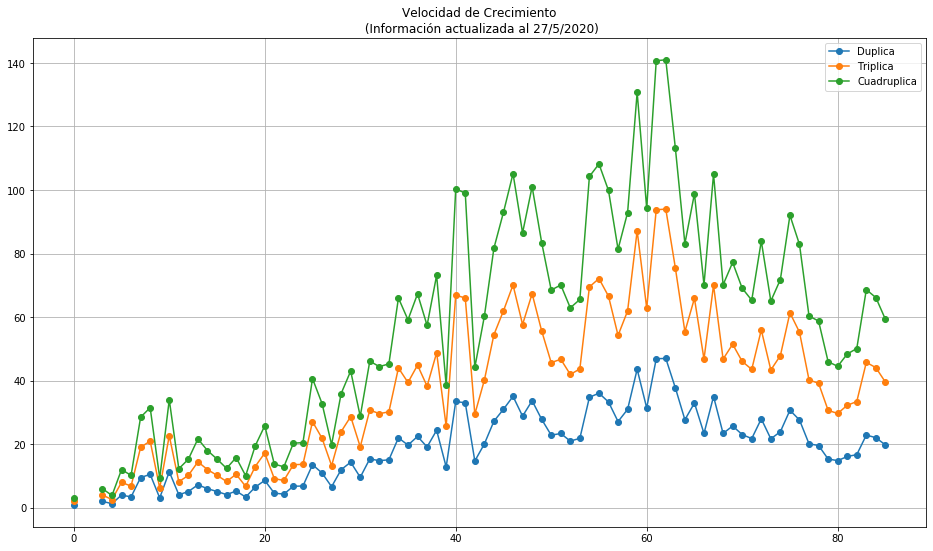

In [8]:
def velocidad(Cn,Ct,n):
    n = n - 1
    velocidad = [] 
    for i in range(len(Ct)):
        velocidad.append((n*Ct[i])/Cn[i])
    return velocidad
plt.figure(figsize=Size)
plt.title('Velocidad de Crecimiento'+info)
plt.plot(velocidad(CasesArgy['Casos Nuevos'],CasesArgy['Casos'],2),'-o',label='Duplica')
plt.plot(velocidad(CasesArgy['Casos Nuevos'],CasesArgy['Casos'],3),'-o',label='Triplica')
plt.plot(velocidad(CasesArgy['Casos Nuevos'],CasesArgy['Casos'],4),'-o',label='Cuadruplica')
plt.legend()
plt.grid()

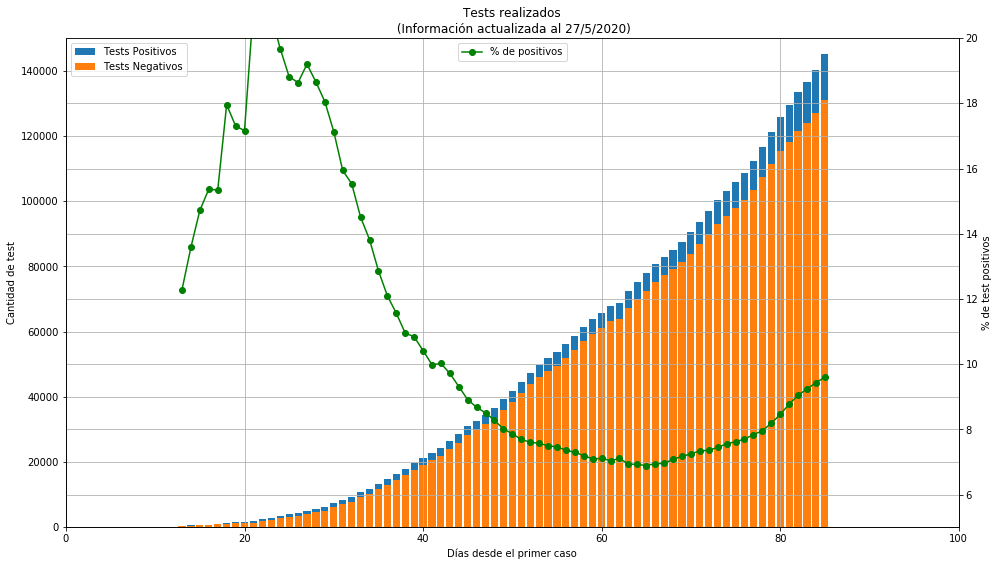

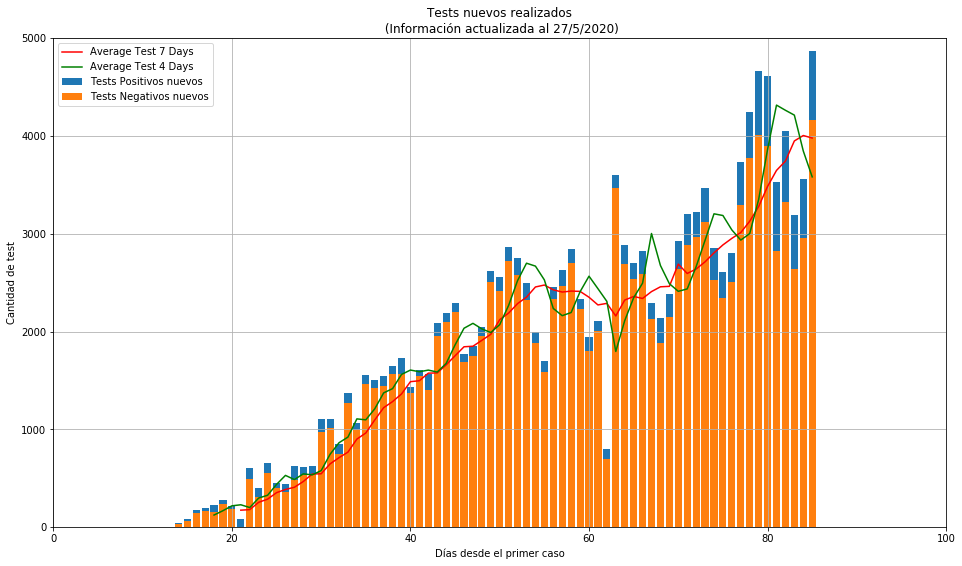

In [9]:
plt.figure(7,figsize=Size)
plt.title('Tests realizados'+info)
xBar = np.arange(len(CasesArgy['Test Totales'].values)) 
plt.ylabel('Cantidad de test')
plt.bar(xBar,CasesArgy['Test Totales'].values,label='Tests Positivos')
plt.bar(xBar,CasesArgy['Test Negativos'].values,label='Tests Negativos')
plt.legend(loc='upper left')
plt.xlabel('Días desde el primer caso')
plt.ylim([0,150000])
plt.grid()
plt.twinx()
porcentaje = 100*((CasesArgy['Test Totales']-CasesArgy['Test Negativos'])/CasesArgy['Test Totales'])
plt.ylabel('% de test positivos')
plt.plot(xBar,porcentaje,'-o',color='green',label='% de positivos')
plt.grid()
plt.xlim([0,maxDias])
plt.ylim([5,20])
plt.legend(loc='upper center')
plt.savefig(fname='GraficoArg4',quality=100,transparent=False,pad_inches=0)
plt.show()

plt.figure(7,figsize=Size)
plt.title('Tests nuevos realizados'+info)
xBar = np.arange(len(CasesArgy['Test Nuevos'].values)) 
plt.ylabel('Cantidad de test')
plt.bar(xBar,CasesArgy['Test Nuevos'].values,label='Tests Positivos nuevos')
plt.plot(SA(CasesArgy['Test Nuevos'].values,7,len(CasesArgy['Test Nuevos'].values)),color='red',label='Average Test 7 Days')
plt.plot(SA(CasesArgy['Test Nuevos'].values,4,len(CasesArgy['Test Nuevos'].values)),color='green',label='Average Test 4 Days')
plt.bar(xBar,CasesArgy['Test Negativos Nuevos'].values,label='Tests Negativos nuevos')
plt.legend(loc='upper left')
plt.xlabel('Días desde el primer caso')
plt.ylim([0,5000])
plt.xlim([0,maxDias])
plt.grid()
plt.savefig(fname='GraficoArg7',quality=100,transparent=False,pad_inches=0)
plt.show()

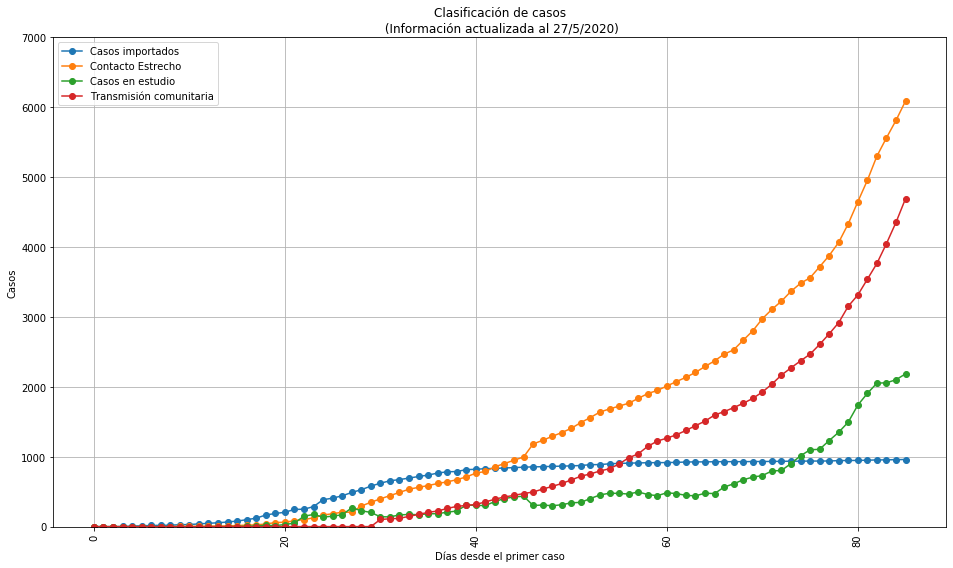

In [10]:
plt.figure(figsize=Size)
plt.title('Clasificación de casos'+info)
plt.plot(CasesArgy['Importados'].values,'-o',label='Casos importados')
plt.plot(CasesArgy['Contacto'].values,'-o',label='Contacto Estrecho')
plt.plot(CasesArgy['En estudio'].values,'-o',label='Casos en estudio')
plt.plot(CasesArgy['Comunitaria'].values,'-o',label='Transmisión comunitaria')
plt.ylim([0,7000])
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.grid()
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.savefig(fname='GraficoArg5',quality=100,transparent=False,pad_inches=0)
plt.show()

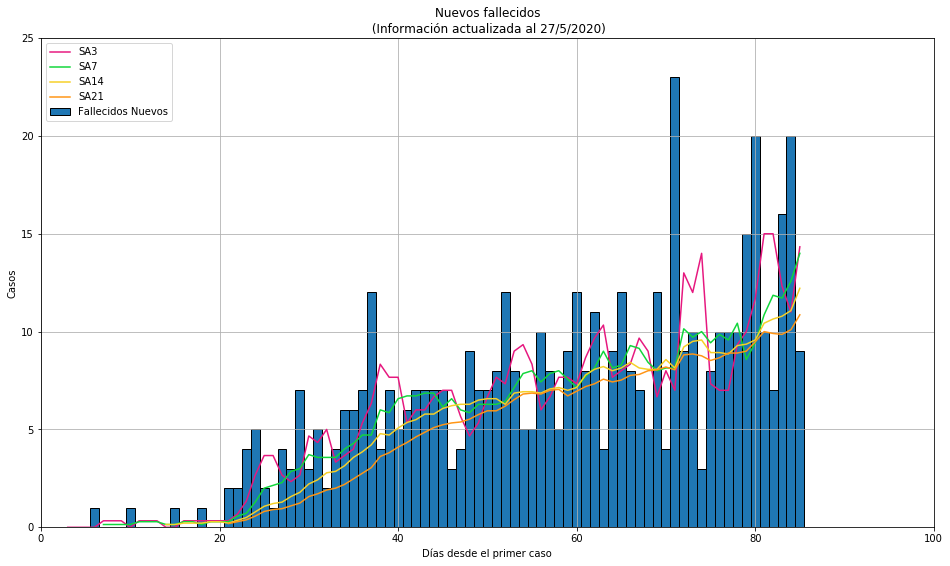

In [11]:
days = [3,7,14,21]
colorsDeaths = ['#E6187F','#11D63B','#F6D027','#FF9515']
  
plt.figure(figsize=Size)
plt.title('Nuevos fallecidos'+info)
plt.bar(x,CasesArgy['Muertes Nuevas'].values, width =1,label='Fallecidos Nuevos',edgecolor='black',linewidth=1)

for i in range(len(days)):
    plt.plot(SA(CasesArgy['Muertes Nuevas'].values,days[i],len(CasesArgy['Muertes Nuevas'])),'-',color=colorsDeaths[i],label=('SA'+str(days[i])))
    
plt.xlim([0,maxDias])
plt.ylim([0,25])#np.max(CasesArgy['Muertes Nuevas'].values)])
plt.xlabel('Días desde el primer caso')
plt.ylabel('Casos')
plt.grid()
plt.legend(loc='upper left')
plt.savefig(fname='GraficoArg6',quality=100,transparent=False,pad_inches=0)
plt.show()

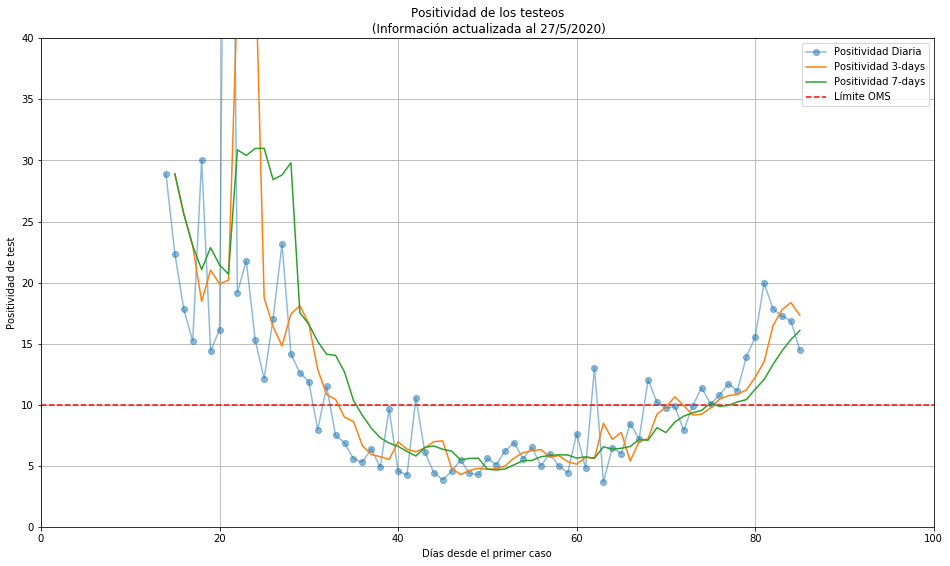

In [14]:
positividad = 100*(CasesArgy['Casos Nuevos']/CasesArgy['Test Nuevos'].values)
plt.figure(figsize=Size)
plt.title('Positividad de los testeos'+info)
plt.ylabel('Positividad de test')
plt.plot(positividad,'-o',alpha=0.5,label='Positividad Diaria')
plt.plot(SA(positividad,3,len(positividad)),label='Positividad 3-days')
plt.plot(SA(positividad,7,len(positividad)),label='Positividad 7-days')
plt.hlines(y=10, xmin=0, xmax=maxDias,linestyle='--',color='red',label='Límite OMS')
plt.legend(loc='upper right')
plt.xlabel('Días desde el primer caso')
plt.ylim([0,40])
plt.xlim([0,maxDias])
plt.grid()
plt.savefig(fname='GraficoArg12',quality=100,transparent=False,pad_inches=0)
plt.show()